In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [2]:
dfg = pd.read_csv('Data.csv')

In [3]:
dfg.describe()

Unnamed: 0     popularity   acousticness   danceability  \
count  174471.000000  174471.000000  174471.000000  174471.000000   
mean   110748.309455      47.732615       0.300640       0.576459   
std     63060.822008      14.642369       0.322995       0.182616   
min       242.000000       0.000000       0.000001       0.057200   
25%     50756.500000      38.000000       0.027800       0.464000   
50%    111862.000000      49.000000       0.161000       0.597000   
75%    165160.500000      58.000000       0.521000       0.711000   
max    228158.000000     100.000000       0.996000       0.987000   

        duration_ms         energy  instrumentalness       liveness  \
count  1.744710e+05  174471.000000     174471.000000  174471.000000   
mean   2.331364e+05       0.595296          0.144883       0.186764   
std    9.380103e+04       0.249924          0.299485       0.154732   
min    1.550900e+04       0.000020          0.000000       0.009670   
25%    1.881875e+05       0.439000          0.000000       0.095700   
50%    2.203070e+05       0.631000          0.000045       0.123000   
75%    2.602400e+05       0.794000          0.031100       0.228000   
max    5.488000e+06       0.999000          0.999000       1.000000   

            loudness    speechiness  ...  duration_ms_zscore  energy_zscore  \
count  174471.000000  174471.000000  ...       174471.000000  174471.000000   
mean       -8.820135       0.093343  ...           -0.029764       0.054991   
std         5.676473       0.096742  ...            0.803928       0.959122   
min       -47.599000       0.022200  ...           -1.894953      -2.229470   
25%       -10.294000       0.036800  ...           -0.415001      -0.544819   
50%        -7.151000       0.050700  ...           -0.139719       0.192010   
75%        -5.257000       0.103000  ...            0.202529       0.817547   
max         1.585000       0.957000  ...           45.007375       1.604265   

       instrumentalness_zscore  liveness_zscore  loudness_zscore  \
count            174471.000000    174471.000000    174471.000000   
mean                  0.025898        -0.141511         0.089972   
std                   1.024069         0.785533         0.955477   
min                  -0.469522        -1.040570        -6.437379   
25%                  -0.469522        -0.603819        -0.158112   
50%                  -0.469368        -0.465224         0.370925   
75%                  -0.363177         0.067834         0.689728   
max                   2.946495         3.987076         1.841389   

       speechiness_zscore   tempo_zscore  valence_zscore  \
count       174471.000000  174471.000000   174471.000000   
mean            -0.156227       0.044190        0.082691   
std              0.519382       0.990613        1.001127   
min             -0.538174      -2.834168       -1.741583   
25%             -0.459791      -0.756863       -0.727474   
50%             -0.385165      -0.011203        0.059536   
75%             -0.104381       0.733839        0.873955   
max              4.480516       3.986174        2.142569   

       lognorm_duration_zscore   Count_zscore  
count            174471.000000  174471.000000  
mean                  0.004521      -0.131281  
std                   0.885327       0.654051  
min                  -6.905958      -0.617885  
25%                  -0.401676      -0.511636  
50%                   0.008964      -0.338281  
75%                   0.443055      -0.030717  
max                   8.387589       7.171880  

[8 rows x 27 columns]

In [4]:
pop = dfg[dfg.popular == 'popular']
nonpop = dfg[dfg.popular == 'not-popular']

Popularity Correlation
popularity                             1.000000
acousticness                           0.016319
danceability                           0.126426
duration_ms                            0.076447
energy                                 0.012766
instrumentalness                       0.051174
liveness                               0.025637
loudness                               0.068466
speechiness                            0.009618
tempo                                  0.004033
valence                                0.029246
lognorm_duration                       0.072561
Count                                  0.007145
popularity_zscore                      1.000000
acousticness_zscore                    0.016319
danceability_zscore                    0.126426
duration_ms_zscore                     0.076447
energy_zscore                          0.012766
instrumentalness_zscore                0.051174
liveness_zscore                        0.025637
loudness_zscore                        0.068466
speechiness_zscore                     0.009618
tempo_zscore                           0.004033
valence_zscore                         0.029246
lognorm_duration_zscore                0.072561
Count_zscore                           0.007145

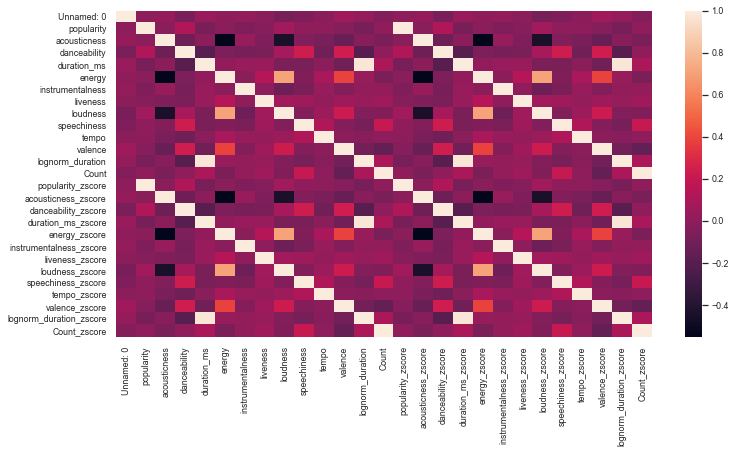

In [5]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(pop.corr())
c = pop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')


From this we get a general idea of what popular music features look like. Printed is the correlations coefficents each feature has with popularity, as it is of most concern for this EDA, and a heatmap of all features.

These trends don't mean much without looking at the trends and corrletions of unpopular music so I will examine them next. 

In [6]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())
c = nonpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

Popularity Correlation
popularity                             1.000000
acousticness                           0.209399
danceability                           0.223843
duration_ms                            0.038816
energy                                 0.166226
instrumentalness                       0.322203
liveness                               0.033362
loudness                               0.306129
speechiness                            0.080095
tempo                                  0.044392
valence                                0.037704
lognorm_duration                       0.052315
Count                                  0.098301
popularity_zscore                      1.000000
acousticness_zscore                    0.209399
danceability_zscore                    0.223843
duration_ms_zscore                     0.038816
energy_zscore                          0.166226
instrumentalness_zscore                0.322203
liveness_zscore                        0.033362
loudness_zscore                        0.306129
speechiness_zscore                     0.080095
tempo_zscore                           0.044392
valence_zscore                         0.037704
lognorm_duration_zscore                0.052315
Count_zscore                           0.098301

From this one can see two large trends that exists between popular versus nonpopular music. Danceability has a positive corrletion with popularity, but almsot no correltion with populairty for unpopular songs. The second is that popular music has a negative correlation with duration, but almost no correlation with duration for unpopular songs. 

# RAP MUSIC

                         Popularity Correlation
Unnamed: 0                             0.207185
popularity                             1.000000
acousticness                           0.034636
danceability                           0.141193
duration_ms                            0.109831
energy                                 0.081578
instrumentalness                       0.052111
liveness                               0.020384
loudness                               0.003477
speechiness                            0.049445
tempo                                  0.015436
valence                                0.013515
lognorm_duration                       0.103642
Count                                  0.015625
popularity_zscore                      1.000000
acousticness_zscore                    0.034636
danceability_zscore                    0.141193
duration_ms_zscore                     0.109831
energy_zscore                          0.081578
instrumentalness_zscore                0

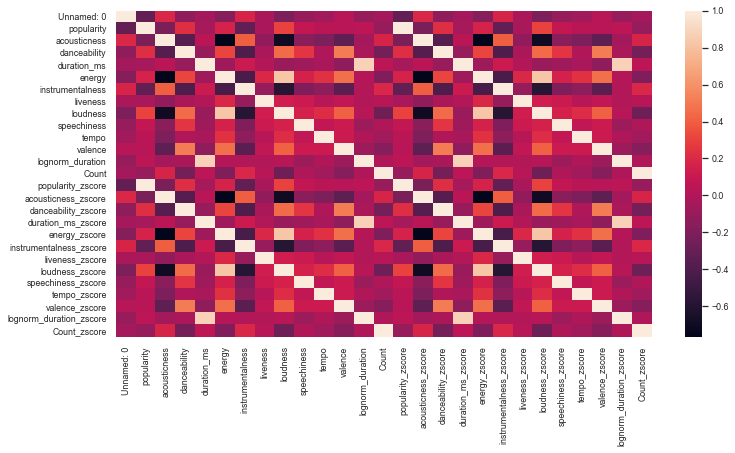

In [7]:
dfe = dfg[dfg['genre'] != 'Rap']
df = dfg[dfg['genre'] == 'Rap']

rappop = df[df.popular == 'popular']
nonrappop = df[df.popular == 'not-popular']

sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())
c = rappop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

This information gives a close look into corrletions among popular and unpopular rap music. I will investigate energy, danceability, loudness, and speechiness since they are the variables with the highest correlations to popularity for rap. I will look in depth at correlations with these features. Along with these the Count and lognorm_duration features will be investigated as they are features not from the Spotify API and which I believe could have correlation with popularity.

Many plots will be created for rap music to begin to visualize what trends and aspects of music make a rap song popular/

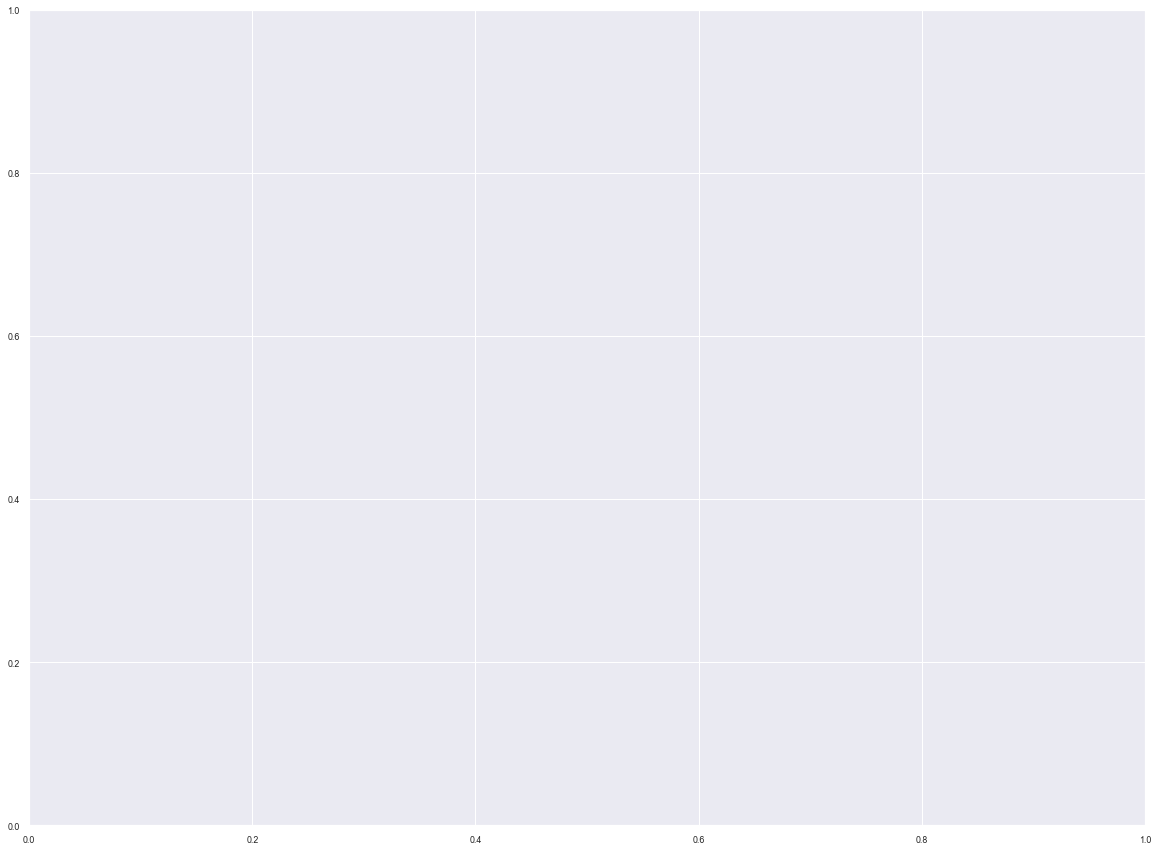

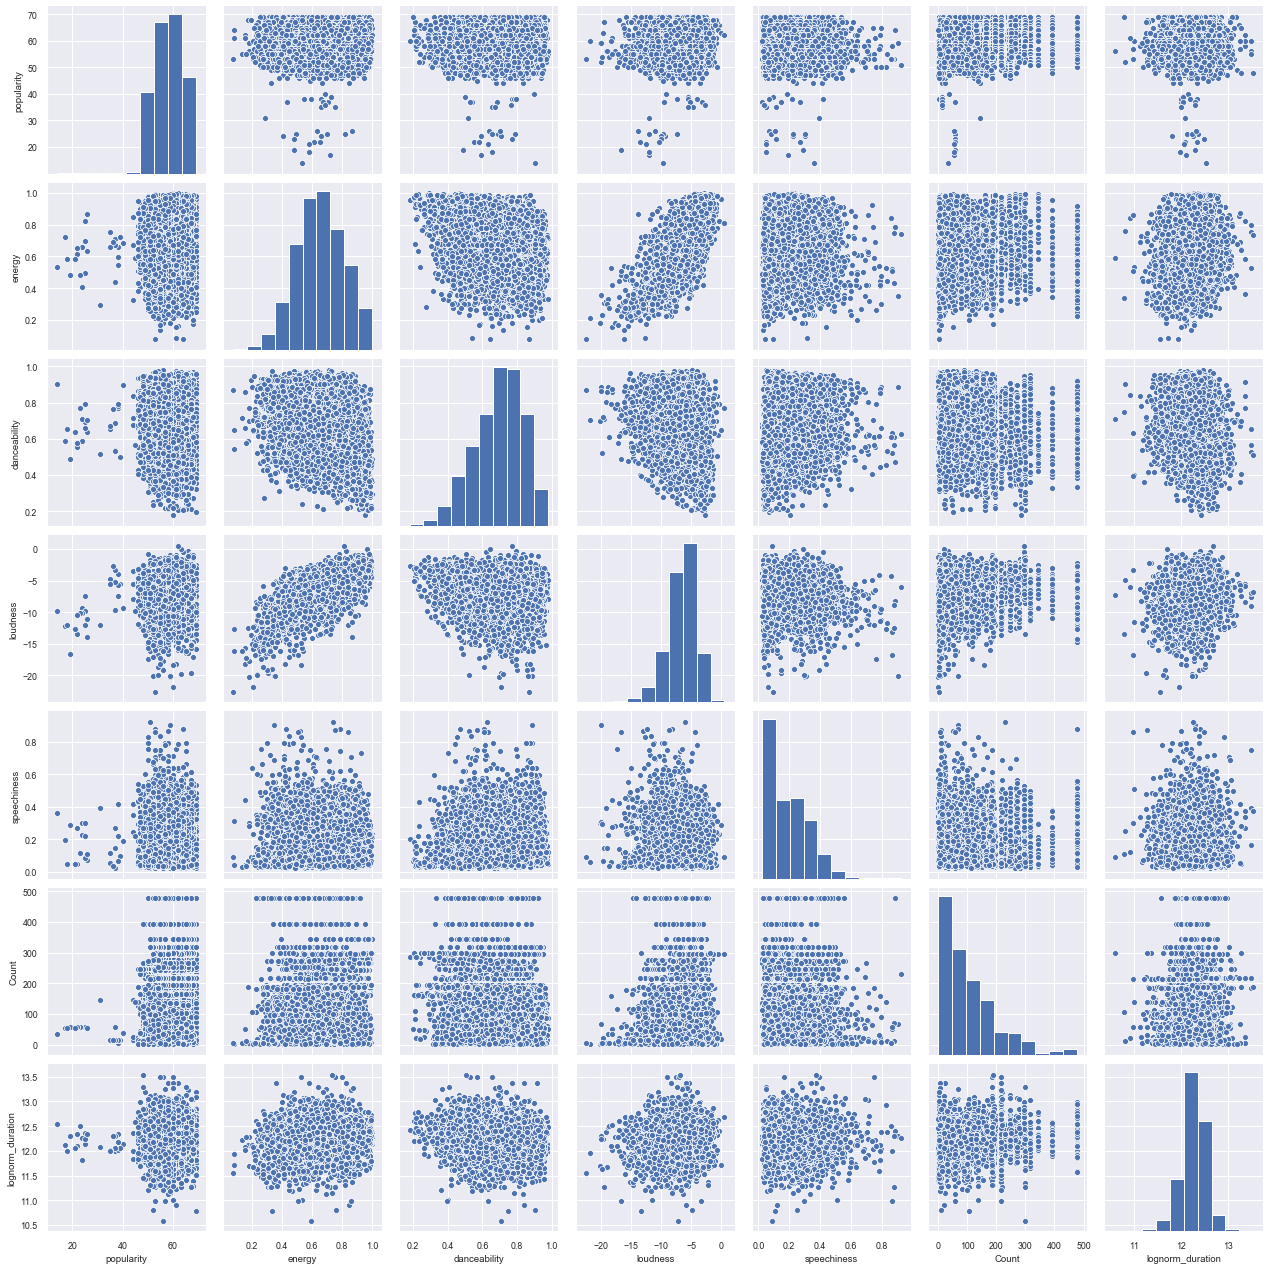

In [8]:
plt.subplots(figsize=(20,15))
pop1 = rappop[['popularity','energy', 'danceability','loudness','speechiness','Count','lognorm_duration']]
nonpop1 = nonrappop[['popularity','energy', 'danceability','loudness','speechiness','Count','lognorm_duration']]

n = sns.pairplot(data=pop1)
print(n)

p = sns.pairplot(data=nonpop1)
print(p)



<ErrorbarContainer object of 3 artists>

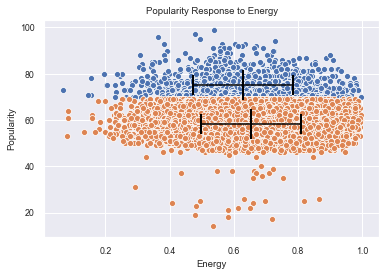

In [9]:
sns.scatterplot(rappop.energy, pop.popularity)
sns.scatterplot(nonrappop.energy, nonpop.popularity)
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.title("Popularity Response to Energy")

plt.errorbar(np.mean(rappop.energy),np.mean(rappop.popularity),xerr=np.std(rappop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonrappop.energy),np.mean(nonrappop.popularity),xerr=np.std(nonrappop.energy),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

It looks like there is a difference in average Energy for popular and unpopular rap music.

<ErrorbarContainer object of 3 artists>

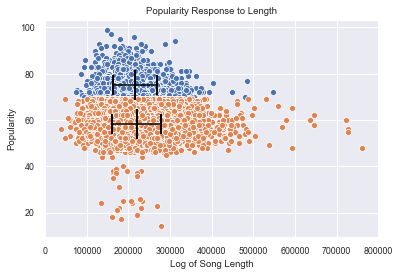

In [10]:
sns.scatterplot(rappop.duration_ms, pop.popularity)
sns.scatterplot(nonrappop.duration_ms, nonpop.popularity)
plt.xlabel("Log of Song Length")
plt.ylabel("Popularity")
plt.title("Popularity Response to Length")

plt.errorbar(np.mean(rappop.duration_ms),np.mean(rappop.popularity),xerr=np.std(rappop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonrappop.duration_ms),np.mean(nonrappop.popularity),xerr=np.std(nonrappop.duration_ms),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

It looks like there is not too much of a difference for the average Log Length feature for popular versus unpooular Rap music, but it does look like there are more outliers with unpopular music.

<ErrorbarContainer object of 3 artists>

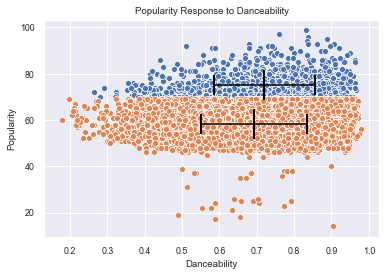

In [11]:
sns.scatterplot(rappop.danceability, pop.popularity)
sns.scatterplot(nonrappop.danceability, nonpop.popularity)
plt.xlabel("Danceability")
plt.ylabel("Popularity")
plt.title("Popularity Response to Danceability")

plt.errorbar(np.mean(rappop.danceability),np.mean(rappop.popularity),xerr=np.std(rappop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonrappop.danceability),np.mean(nonrappop.popularity),xerr=np.std(nonrappop.danceability),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

As mentioned before with all music, there is a difference in danceability average for popular versus unpopular music.

In [12]:
sns.scatterplot(rappop.Count, pop.popularity)
sns.scatterplot(nonrappop.Count, nonpop.popularity)
plt.xlabel("Count")
plt.ylabel("Popularity")
plt.title("Popularity Response to Count")

plt.errorbar(np.mean(rappop.Count),np.mean(rappop.popularity),xerr=np.std(rappop.Count),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')
plt.errorbar(np.mean(nonrappop.Count),np.mean(nonrappop.popularity),xerr=np.std(nonrappop.Count),fmt='|', ms=30,mew=2,capthick=2,capsize=10,color='black')

<ErrorbarContainer object of 3 artists>

It appears that there is a differnce for popular and unpopular songs for Count, popular songs tend to be made by artists that have more songs out.

Next, I will investigate and compare these features another way to view how the selected features differ between popular and unpopular rap songs. 

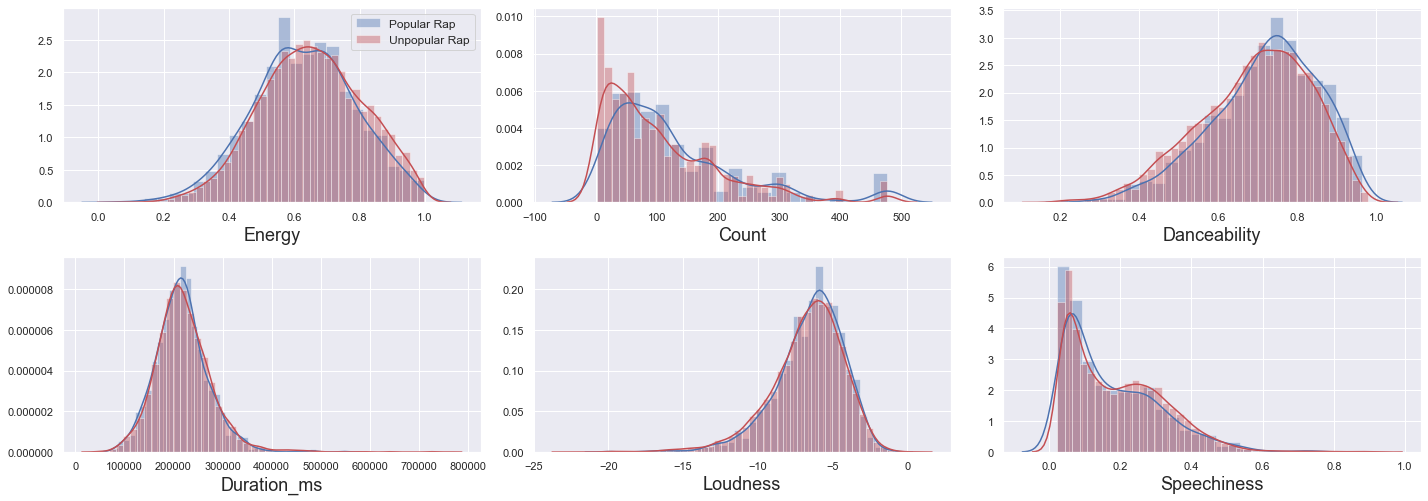

In [13]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(rappop.energy, label='Popular Rap')
sns.distplot(nonrappop.energy, color='r', label='Unpopular Rap')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(rappop.Count)
sns.distplot(nonrappop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(rappop.danceability)
sns.distplot(nonrappop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(rappop.duration_ms)
sns.distplot(nonrappop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(rappop.loudness)
sns.distplot(nonrappop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(336)
sns.distplot(rappop.speechiness)
sns.distplot(nonrappop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


This is just a more in depth look at how these features differ between popular and unpopular songs, but also one can see how the data are distributed better, e.g if they are a perfect bell curve, bimodal, etc. and how outliers look. 

Most of them follow the bell curve, however count is distributed discretly the more an artists produces. Between 0 and 100 it is normal, 100 to 200 is elongated, but from 200 on, especially after 300 it looks like nothing exists until blips at 400 and 500 for both unpopular and popular music. The only difference being popular music has larger magnitudes out there. 

Going forward for the rest of the genres this is the best way to visualize the differences in the data for key features when making comparisons of popular to unpopular music, and music fro ma gtiven genre to the rest of the music. As one can see how the data is distrubted as a curve rather than data points, making trends easier to pick up on.

After these curves are generated for the features of each genre, one will be able to see the differences in features between popular and unpopular music. The question then becomes, are these differnces significant and can they be used to differentiate popular and unpopular music? For this a t-test can be used to see if the differnces in features are significant. 


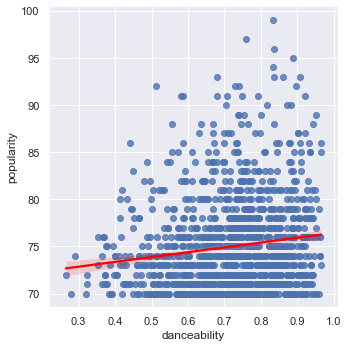

In [14]:
n = sns.lmplot(x='danceability',y='popularity',data=rappop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='danceability',y='popularity',data=nonrappop,line_kws={'color': 'red'})
print(p)


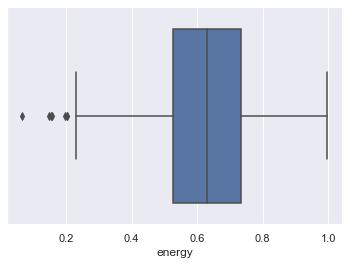

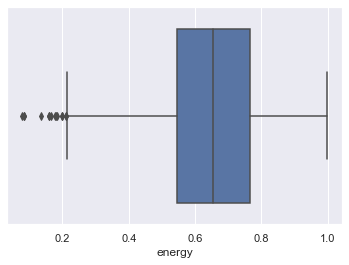

In [15]:
sns.boxplot(x='energy', data=rappop, whis=1.5)
plt.show()

sns.boxplot(x='energy', data=nonrappop, whis=1.5)
plt.show()

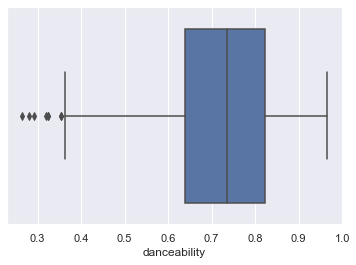

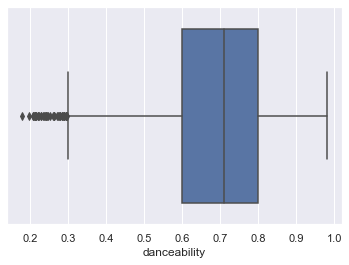

In [16]:
sns.boxplot(x='danceability', data=rappop, whis=1.5)
plt.show()

sns.boxplot(x='danceability', data=nonrappop, whis=1.5)
plt.show()

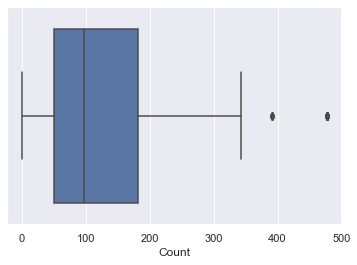

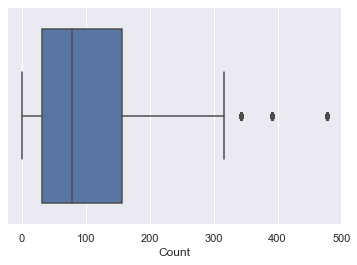

In [17]:
sns.boxplot(x='Count', data=rappop, whis=1.5)
plt.show()

sns.boxplot(x='Count', data=nonrappop, whis=1.5)
plt.show()

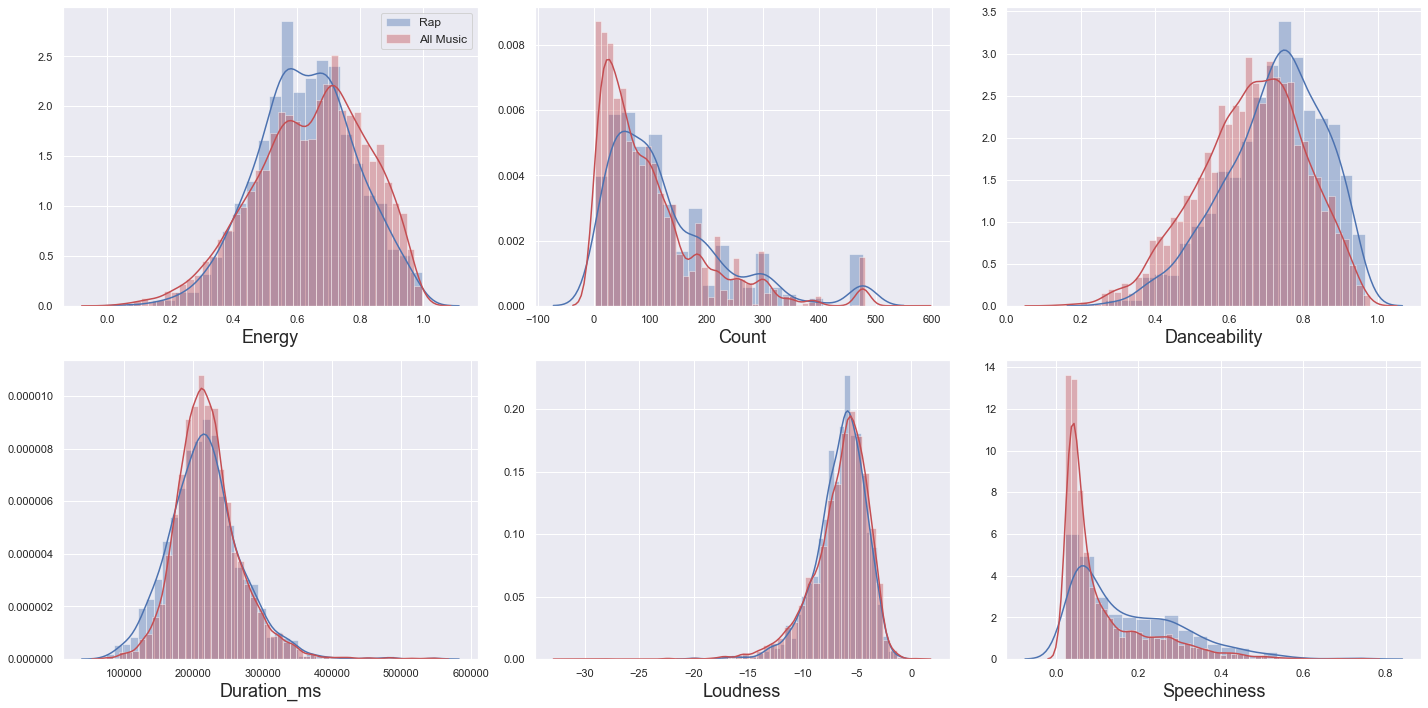

In [18]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(rappop.energy, label='Rap')
sns.distplot(pop.energy, color='r', label='All Music')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(rappop.Count)
sns.distplot(pop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(rappop.danceability)
sns.distplot(pop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(rappop.duration_ms)
sns.distplot(pop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(rappop.loudness)
sns.distplot(pop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(236)
sns.distplot(rappop.speechiness)
sns.distplot(pop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)



plt.tight_layout()
plt.show()


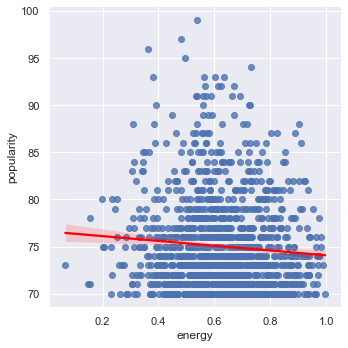

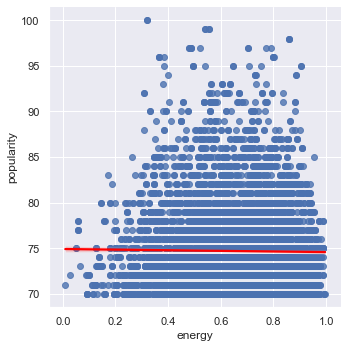

In [19]:
n = sns.lmplot(x='energy',y='popularity',data=rappop,line_kws={'color': 'red'})
print(n)
p = sns.lmplot(x='energy',y='popularity',data=pop,line_kws={'color': 'red'})
print(p)

# COUNTRY MUSIC

                         Popularity Correlation
Unnamed: 0                             0.337101
popularity                             1.000000
acousticness                           0.219471
danceability                           0.249500
duration_ms                            0.050089
energy                                 0.172618
instrumentalness                       0.342043
liveness                               0.037307
loudness                               0.322050
speechiness                            0.091117
tempo                                  0.049481
valence                                0.047408
lognorm_duration                       0.041073
Count                                  0.081619
popularity_zscore                      1.000000
acousticness_zscore                    0.219471
danceability_zscore                    0.249500
duration_ms_zscore                     0.050089
energy_zscore                          0.172618
instrumentalness_zscore                0

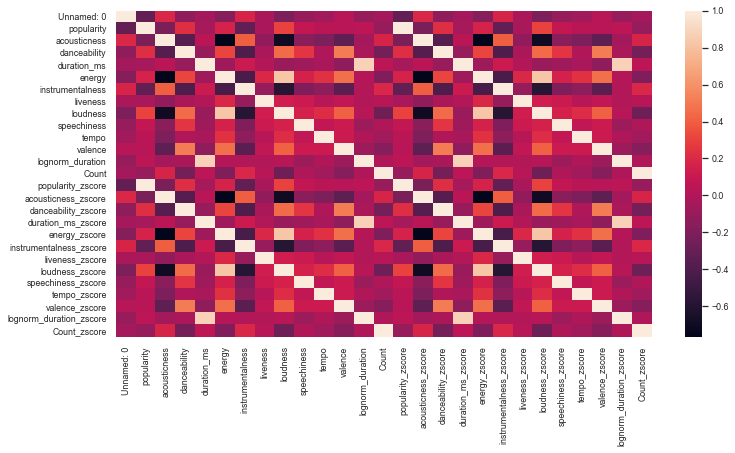

In [20]:
dfe = dfg[dfg['genre'] != 'Country']
df = dfg[dfg['genre'] == 'Country']

coupop = df[df.popular == 'popular']
noncoupop = df[df.popular == 'not-popular']

sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpop.corr())
c = dfe.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

This is the feature correlation makeup of country music. Let us further examine how these features differ between popular and unpopular country.

In [21]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(coupop.corr())
c = coupop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

                         Popularity Correlation
Unnamed: 0                             0.527848
popularity                             1.000000
acousticness                           0.163524
danceability                           0.079182
duration_ms                            0.040086
energy                                 0.227212
instrumentalness                       0.002674
liveness                               0.049755
loudness                               0.188936
speechiness                            0.075055
tempo                                  0.125076
valence                                0.083629
lognorm_duration                       0.029506
Count                                  0.114112
popularity_zscore                      1.000000
acousticness_zscore                    0.163524
danceability_zscore                    0.079182
duration_ms_zscore                     0.040086
energy_zscore                          0.227212
instrumentalness_zscore                0

                         Popularity Correlation
Unnamed: 0                             0.757067
popularity                             1.000000
acousticness                           0.032703
danceability                           0.021949
duration_ms                            0.012109
energy                                 0.046151
instrumentalness                       0.007231
liveness                               0.066403
loudness                               0.028647
speechiness                            0.028374
tempo                                  0.014693
valence                                0.047121
lognorm_duration                       0.014929
Count                                  0.102185
popularity_zscore                      1.000000
acousticness_zscore                    0.032703
danceability_zscore                    0.021949
duration_ms_zscore                     0.012109
energy_zscore                          0.046151
instrumentalness_zscore                0

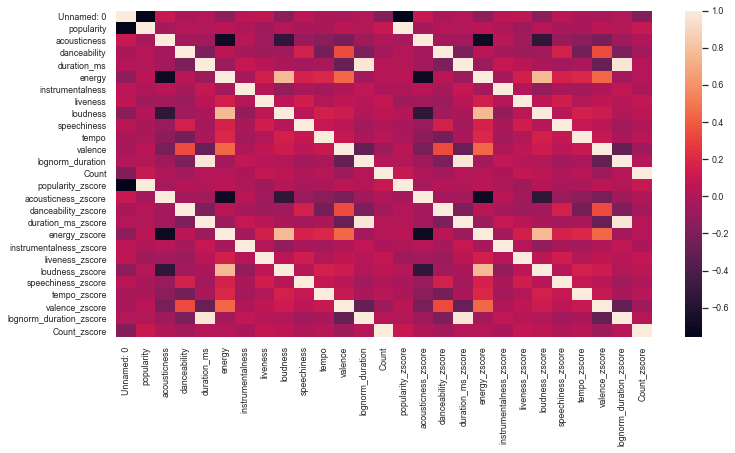

In [22]:

sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(noncoupop.corr())
c = noncoupop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

From this we can glean that energy has a large negative corrletion in popular music, but a slight positive correlation with unpopular music. Acousticness has a large positive correlation with popularity for popular music, but a slight negative one for unpopular music. Loudness has a large negative correlation with popular music that does not exist with unpopular music. 

Going forward let's look at count, valence, energy, acousticness, loudness, and liveness.

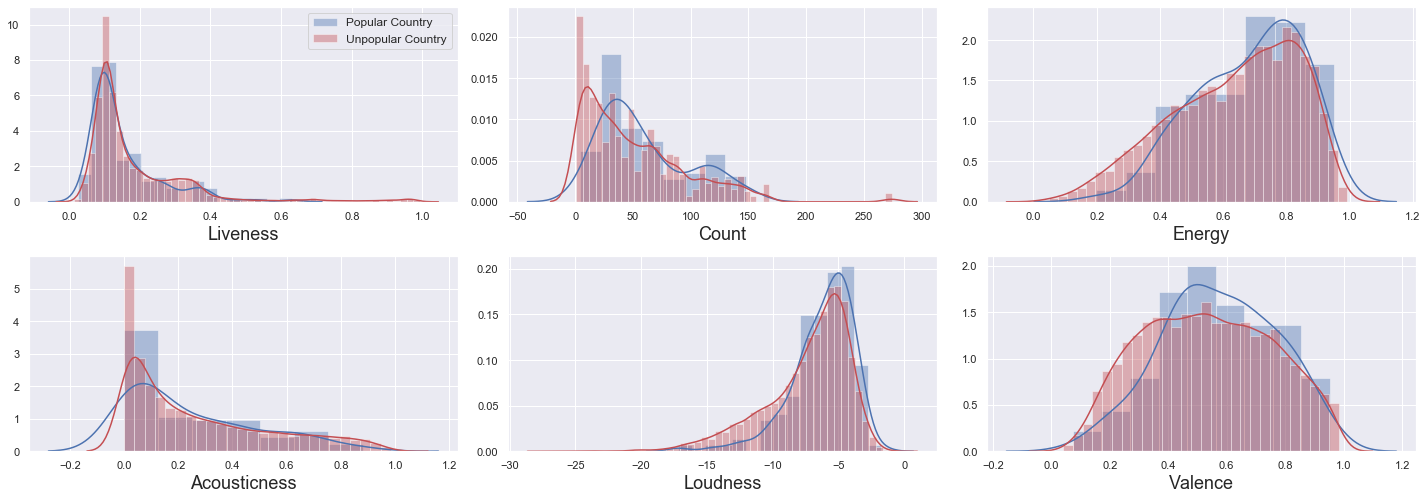

In [23]:

plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(coupop.liveness, label='Popular Country')
sns.distplot(noncoupop.liveness, color='r', label='Unpopular Country')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(coupop.Count)
sns.distplot(noncoupop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(coupop.energy)
sns.distplot(noncoupop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(coupop.acousticness)
sns.distplot(noncoupop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)

plt.subplot(335)
sns.distplot(coupop.loudness)
sns.distplot(noncoupop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(336)
sns.distplot(coupop.valence)
sns.distplot(noncoupop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

plt.tight_layout()
plt.show()


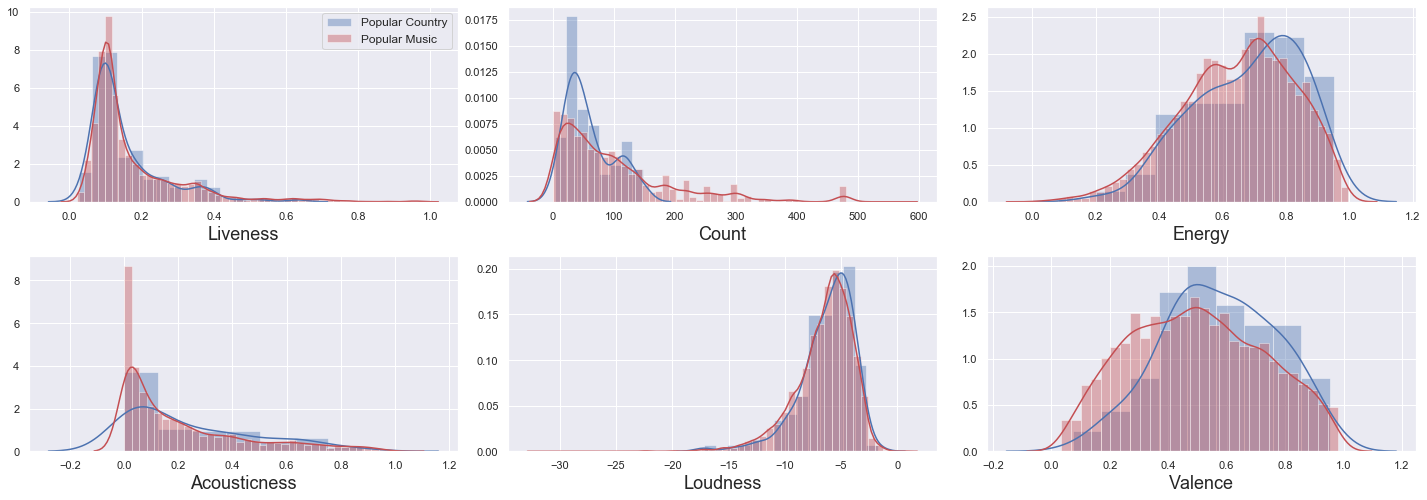

In [24]:

plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(coupop.liveness, label='Popular Country')
sns.distplot(pop.liveness, color='r', label='Popular Music')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(coupop.Count)
sns.distplot(pop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(coupop.energy)
sns.distplot(pop.energy, color='r')
plt.xlabel('Energy', fontsize=18)

plt.subplot(334)
sns.distplot(coupop.acousticness)
sns.distplot(pop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)

plt.subplot(335)
sns.distplot(coupop.loudness)
sns.distplot(pop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(336)
sns.distplot(coupop.valence)
sns.distplot(pop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

plt.tight_layout()
plt.show()


# ALTERNATIVE

In [25]:
dfe = dfg[dfg['genre'] != 'Alternative']
df = dfg[dfg['genre'] == 'Alternative']

altpop = df[df.popular == 'popular']
nonaltpop = df[df.popular == 'not-popular']
#I will not look at the correltion here because we only want to look at the differences between popular and unpopular alternative
#sns.set(font_scale=0.8)
#plt.figure(figsize=(12, 6))
#sns.heatmap(nonpop.corr())
#c = dfe.corr().abs()
#s = c.unstack()
#s = s.popularity
#s = pd.DataFrame(s,columns=['Popularity Correlation'])
#s.drop('Unnamed: 0')

#print(s)




                         Popularity Correlation
Unnamed: 0                             0.351447
popularity                             1.000000
acousticness                           0.013696
danceability                           0.018215
duration_ms                            0.041429
energy                                 0.032572
instrumentalness                       0.086188
liveness                               0.041125
loudness                               0.092708
speechiness                            0.025798
tempo                                  0.032107
valence                                0.091151
lognorm_duration                       0.033415
Count                                  0.157484
popularity_zscore                      1.000000
acousticness_zscore                    0.013696
danceability_zscore                    0.018215
duration_ms_zscore                     0.041429
energy_zscore                          0.032572
instrumentalness_zscore                0

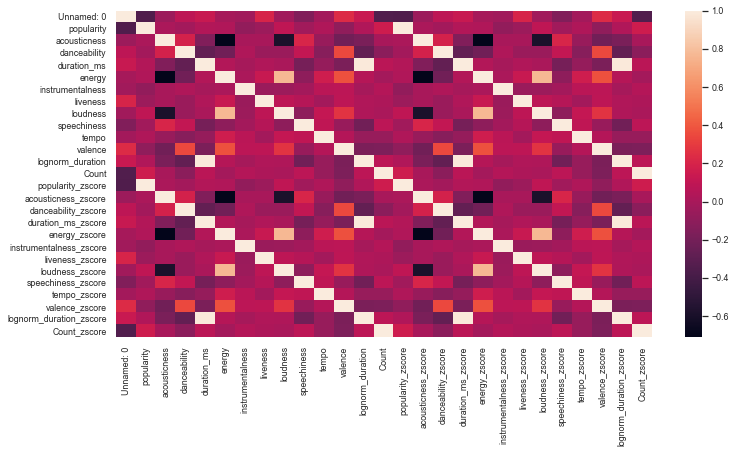

In [26]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(altpop.corr())
c = altpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

                         Popularity Correlation
Unnamed: 0                             0.592712
popularity                             1.000000
acousticness                           0.007831
danceability                           0.065565
duration_ms                            0.020139
energy                                 0.014335
instrumentalness                       0.030022
liveness                               0.026340
loudness                               0.016221
speechiness                            0.019036
tempo                                  0.039536
valence                                0.057191
lognorm_duration                       0.038499
Count                                  0.080252
popularity_zscore                      1.000000
acousticness_zscore                    0.007831
danceability_zscore                    0.065565
duration_ms_zscore                     0.020139
energy_zscore                          0.014335
instrumentalness_zscore                0

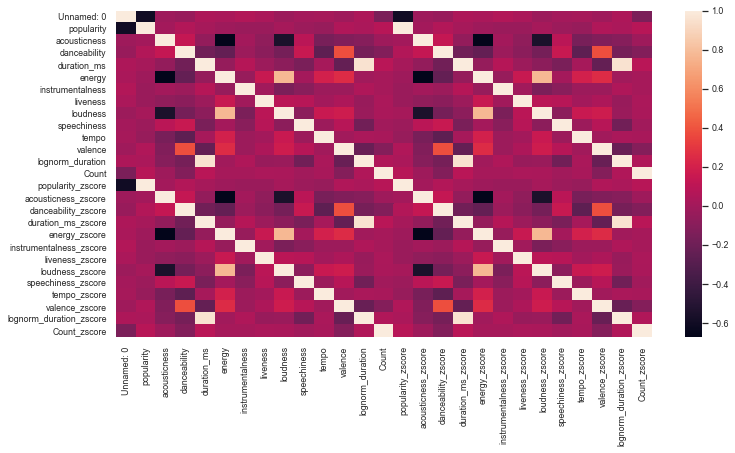

In [27]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonaltpop.corr())
c = nonaltpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

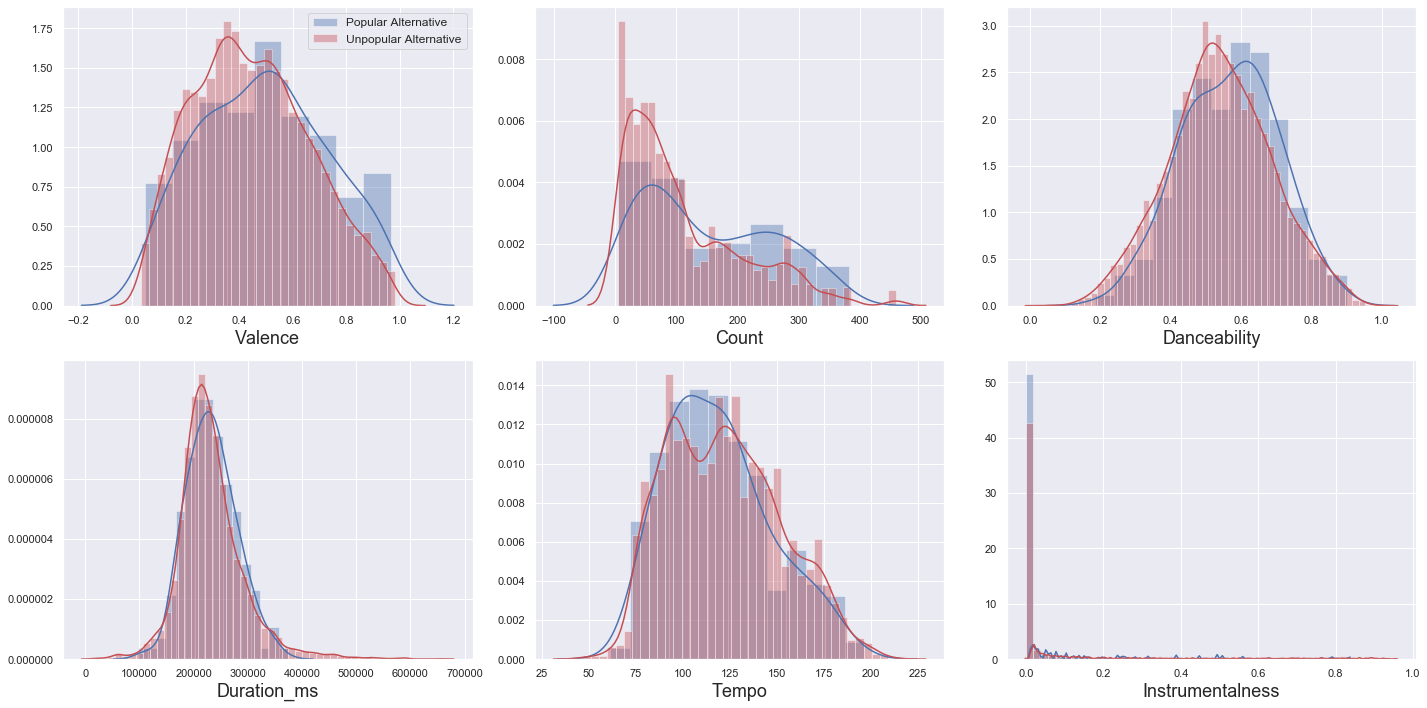

In [28]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(231)
sns.distplot(altpop.valence, label='Popular Alternative')
sns.distplot(nonaltpop.valence, color='r', label='Unpopular Alternative')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(altpop.Count)
sns.distplot(nonaltpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(altpop.danceability)
sns.distplot(nonaltpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(altpop.duration_ms)
sns.distplot(nonaltpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(altpop.tempo)
sns.distplot(nonaltpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(altpop.instrumentalness)
sns.distplot(nonaltpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


In [29]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(altpop.valence, label='Popular Alternative')
sns.distplot(pop.valence, color='r', label='Other Music')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(altpop.Count)
sns.distplot(pop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(altpop.danceability)
sns.distplot(pop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(altpop.duration_ms)
sns.distplot(pop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(altpop.tempo)
sns.distplot(pop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(altpop.instrumentalness)
sns.distplot(pop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)


plt.show()


# POP

In [30]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Pop']
df = dfg[dfg['genre'] == 'Pop']

poppop = df[df.popular == 'popular']
nonpoppop = df[df.popular == 'not-popular']

                         Popularity Correlation
Unnamed: 0                             0.432789
popularity                             1.000000
acousticness                           0.003704
danceability                           0.111180
duration_ms                            0.085121
energy                                 0.021216
instrumentalness                       0.024353
liveness                               0.026958
loudness                               0.037878
speechiness                            0.011804
tempo                                  0.005969
valence                                0.029414
lognorm_duration                       0.077392
Count                                  0.009708
popularity_zscore                      1.000000
acousticness_zscore                    0.003704
danceability_zscore                    0.111180
duration_ms_zscore                     0.085121
energy_zscore                          0.021216
instrumentalness_zscore                0

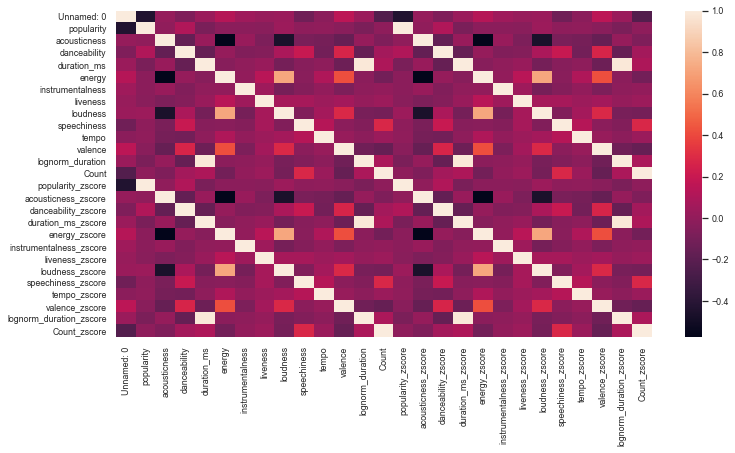

In [31]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(poppop.corr())
c = poppop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

                         Popularity Correlation
Unnamed: 0                             0.365579
popularity                             1.000000
acousticness                           0.039733
danceability                           0.046513
duration_ms                            0.009201
energy                                 0.061155
instrumentalness                       0.029291
liveness                               0.007403
loudness                               0.036945
speechiness                            0.017180
tempo                                  0.016725
valence                                0.025488
lognorm_duration                       0.026034
Count                                  0.014289
popularity_zscore                      1.000000
acousticness_zscore                    0.039733
danceability_zscore                    0.046513
duration_ms_zscore                     0.009201
energy_zscore                          0.061155
instrumentalness_zscore                0

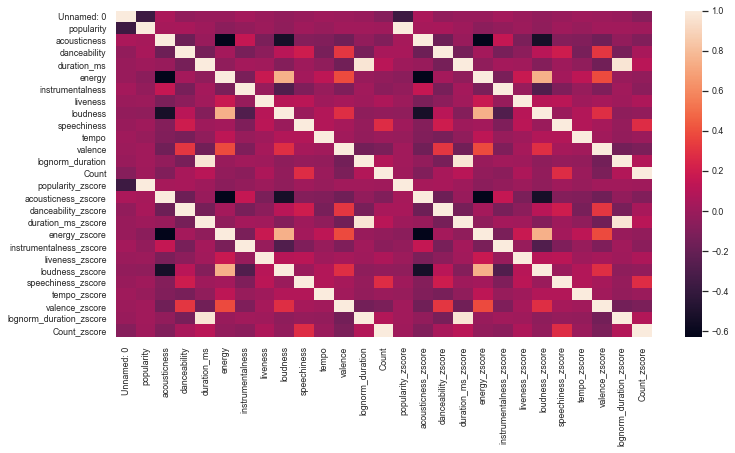

In [32]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonpoppop.corr())
c = nonpoppop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

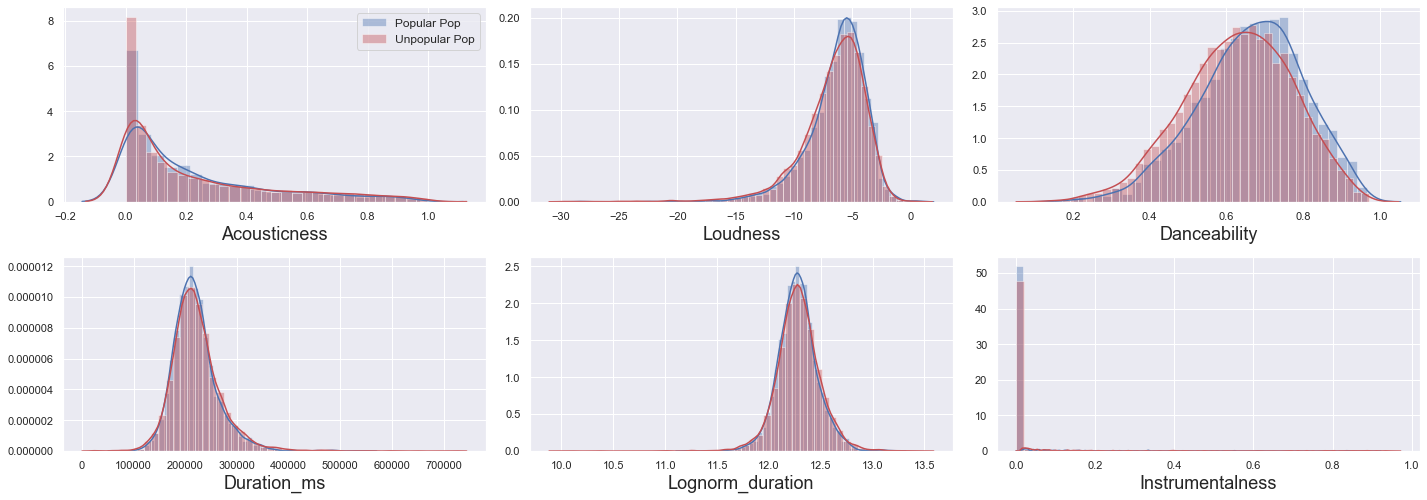

In [33]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(poppop.acousticness, label='Popular Pop')
sns.distplot(nonpoppop.acousticness, color='r', label='Unpopular Pop')
plt.xlabel('Acousticness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(poppop.loudness)
sns.distplot(nonpoppop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(333)
sns.distplot(poppop.danceability)
sns.distplot(nonpoppop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(poppop.duration_ms)
sns.distplot(nonpoppop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(poppop.lognorm_duration)
sns.distplot(nonpoppop.lognorm_duration, color='r')
plt.xlabel('Lognorm_duration', fontsize=18)

plt.subplot(336)
sns.distplot(poppop.instrumentalness)
sns.distplot(nonpoppop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


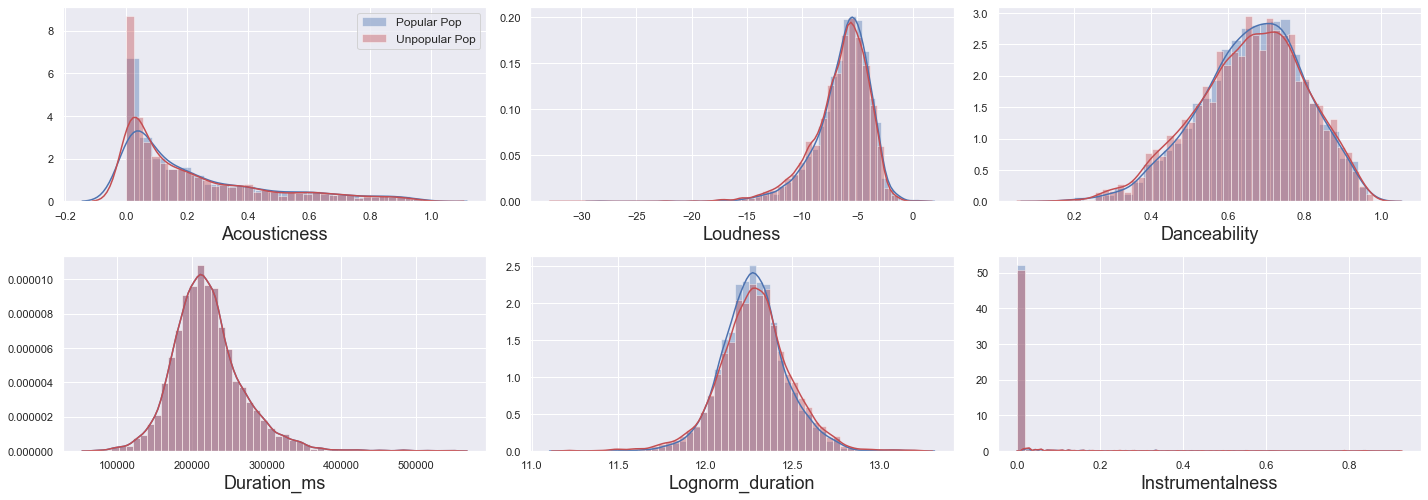

In [34]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(poppop.acousticness, label='Popular Pop')
sns.distplot(pop.acousticness, color='r', label='Unpopular Pop')
plt.xlabel('Acousticness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(poppop.loudness)
sns.distplot(pop.loudness, color='r')
plt.xlabel('Loudness', fontsize=18)

plt.subplot(333)
sns.distplot(poppop.danceability)
sns.distplot(pop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(pop.duration_ms)
sns.distplot(pop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(poppop.lognorm_duration)
sns.distplot(pop.lognorm_duration, color='r')
plt.xlabel('Lognorm_duration', fontsize=18)

plt.subplot(336)
sns.distplot(poppop.instrumentalness)
sns.distplot(pop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


In [35]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(331)
sns.distplot(poppop.speechiness, label='Popular Pop')
sns.distplot(pop.speechiness, color='r', label='Unpopular Pop')
plt.xlabel('Speechiness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(poppop.tempo)
sns.distplot(pop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(333)
sns.distplot(poppop.valence)
sns.distplot(pop.valence, color='r')
plt.xlabel('Valence', fontsize=18)

Text(0.5, 0, 'Valence')

# INDIE

In [36]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Indie']
df = dfg[dfg['genre'] == 'Indie']

indpop = df[df.popular == 'popular']
nonindpop = df[df.popular == 'not-popular']

sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(indpop.corr())
c = indpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)



                         Popularity Correlation
Unnamed: 0                             0.173068
popularity                             1.000000
acousticness                           0.158444
danceability                           0.020218
duration_ms                            0.097663
energy                                 0.128049
instrumentalness                       0.027592
liveness                               0.076641
loudness                               0.171480
speechiness                            0.021276
tempo                                  0.122812
valence                                0.036272
lognorm_duration                       0.099012
Count                                  0.082967
popularity_zscore                      1.000000
acousticness_zscore                    0.158444
danceability_zscore                    0.020218
duration_ms_zscore                     0.097663
energy_zscore                          0.128049
instrumentalness_zscore                0

                         Popularity Correlation
Unnamed: 0                             0.431064
popularity                             1.000000
acousticness                           0.066485
danceability                           0.088678
duration_ms                            0.015129
energy                                 0.075238
instrumentalness                       0.060956
liveness                               0.038685
loudness                               0.015372
speechiness                            0.032395
tempo                                  0.059564
valence                                0.012981
lognorm_duration                       0.001421
Count                                  0.051547
popularity_zscore                      1.000000
acousticness_zscore                    0.066485
danceability_zscore                    0.088678
duration_ms_zscore                     0.015129
energy_zscore                          0.075238
instrumentalness_zscore                0

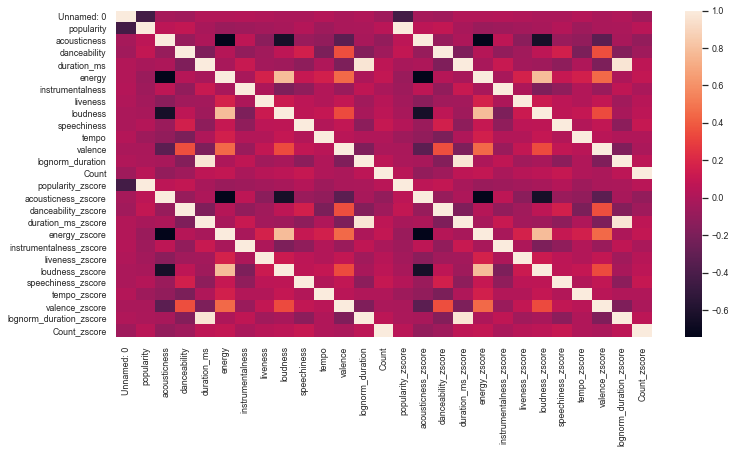

In [37]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonindpop.corr())
c = nonindpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

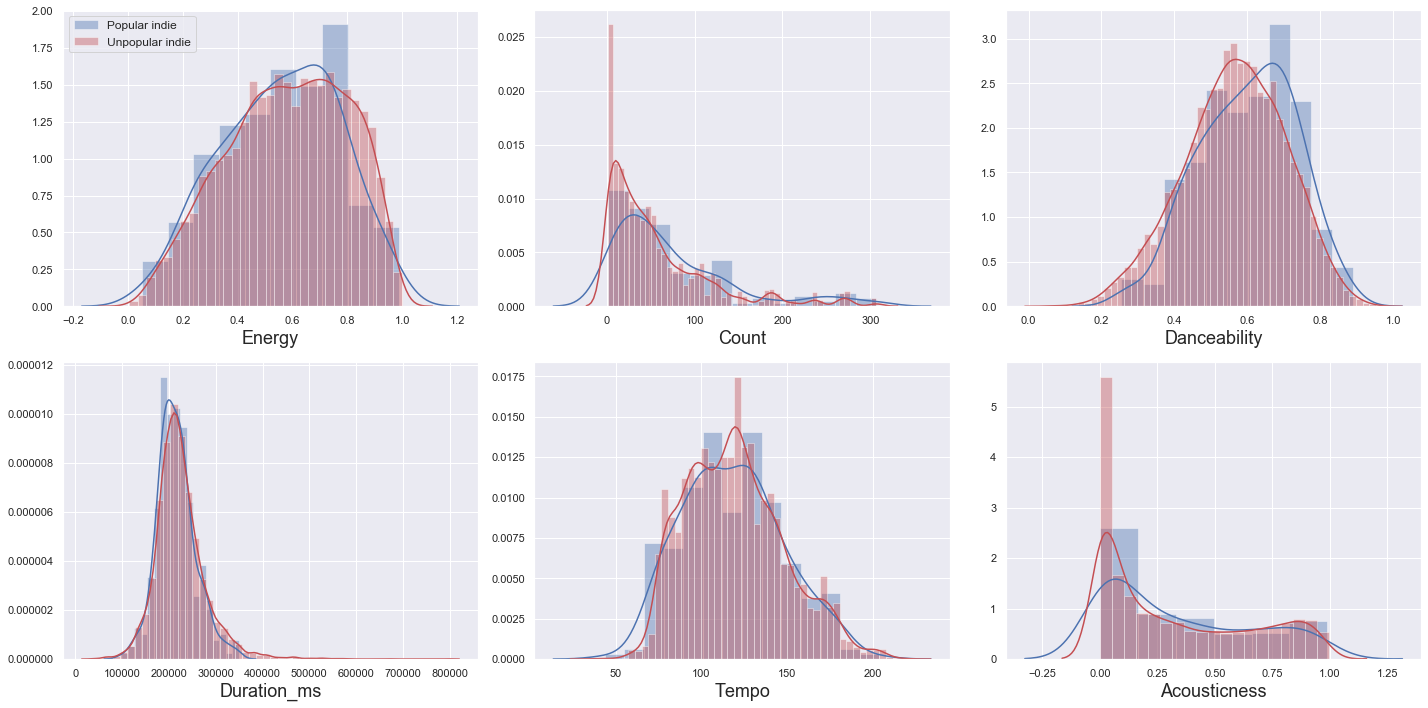

In [38]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(indpop.energy, label='Popular indie')
sns.distplot(nonindpop.energy, color='r', label='Unpopular indie')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(indpop.Count)
sns.distplot(nonindpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(indpop.danceability)
sns.distplot(nonindpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(indpop.duration_ms)
sns.distplot(nonindpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(indpop.tempo)
sns.distplot(nonindpop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(indpop.acousticness)
sns.distplot(nonindpop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)

plt.tight_layout()
plt.show()


In [39]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(231)
sns.distplot(indpop.energy, label='Indie')
sns.distplot(pop.energy, color='r', label='Other Music')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(indpop.Count)
sns.distplot(pop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(indpop.danceability)
sns.distplot(pop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(indpop.duration_ms)
sns.distplot(pop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(indpop.tempo)
sns.distplot(pop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(indpop.acousticness)
sns.distplot(pop.acousticness, color='r')
plt.xlabel('Acousticness', fontsize=18)



plt.tight_layout()
plt.show()


# Jazz

In [40]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Jazz']
df = dfg[dfg['genre'] == 'Jazz']

jazpop = df[df.popular == 'popular']
nonjazpop = df[df.popular == 'not-popular']

sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(jazpop.corr())
c = jazpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)



                         Popularity Correlation
Unnamed: 0                             0.513599
popularity                             1.000000
acousticness                           0.024876
danceability                           0.066364
duration_ms                            0.084744
energy                                 0.038897
instrumentalness                       0.354476
liveness                               0.021120
loudness                               0.197112
speechiness                            0.349342
tempo                                  0.049754
valence                                0.355214
lognorm_duration                       0.066691
Count                                  0.320801
popularity_zscore                      1.000000
acousticness_zscore                    0.024876
danceability_zscore                    0.066364
duration_ms_zscore                     0.084744
energy_zscore                          0.038897
instrumentalness_zscore                0

                         Popularity Correlation
Unnamed: 0                             0.445670
popularity                             1.000000
acousticness                           0.046721
danceability                           0.028501
duration_ms                            0.002421
energy                                 0.073363
instrumentalness                       0.132917
liveness                               0.050666
loudness                               0.022876
speechiness                            0.045403
tempo                                  0.013150
valence                                0.061991
lognorm_duration                       0.022970
Count                                  0.126317
popularity_zscore                      1.000000
acousticness_zscore                    0.046721
danceability_zscore                    0.028501
duration_ms_zscore                     0.002421
energy_zscore                          0.073363
instrumentalness_zscore                0

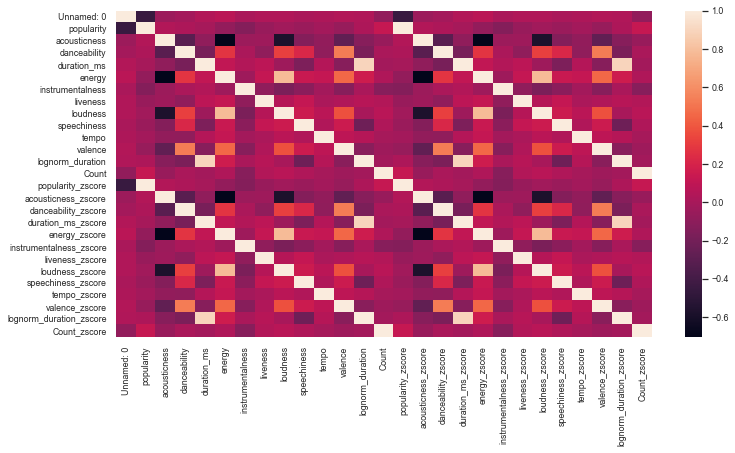

In [41]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonjazpop.corr())
c = nonjazpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)



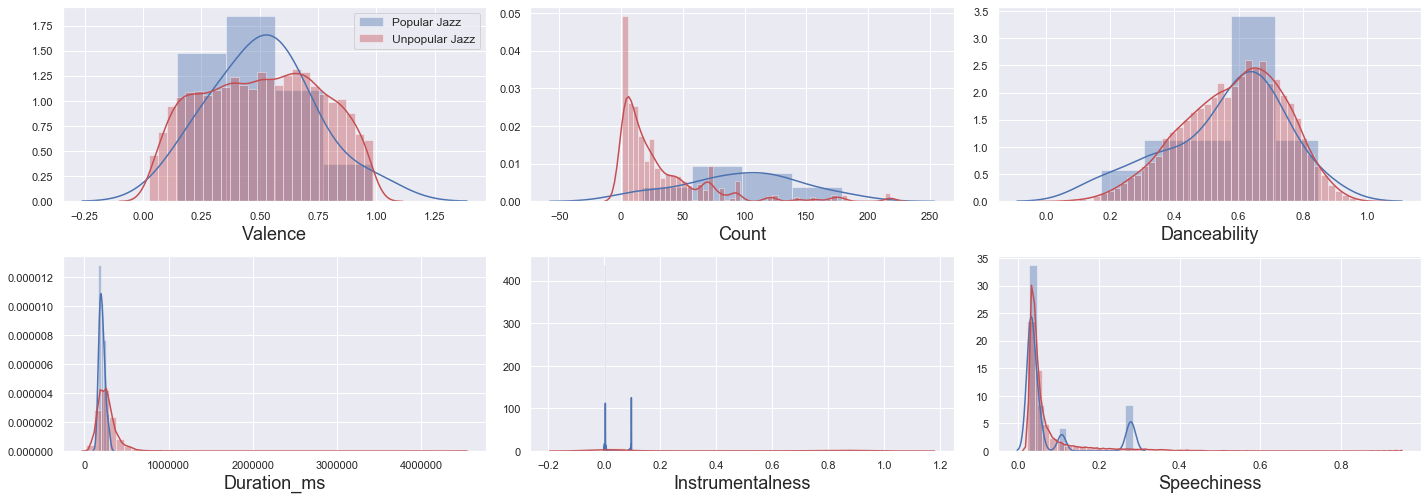

In [42]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(jazpop.valence, label='Popular Jazz')
sns.distplot(nonjazpop.valence, color='r', label='Unpopular Jazz')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(jazpop.Count)
sns.distplot(nonjazpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(jazpop.danceability)
sns.distplot(nonjazpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(jazpop.duration_ms)
sns.distplot(nonjazpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(jazpop.instrumentalness)
sns.distplot(nonjazpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(jazpop.speechiness)
sns.distplot(nonjazpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


In [43]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(jazpop.valence, label='Popular Jazz')
sns.distplot(pop.valence, color='r', label='Popular Music')
plt.xlabel('Valence', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(jazpop.Count)
sns.distplot(pop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(jazpop.danceability)
sns.distplot(pop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(jazpop.duration_ms)
sns.distplot(pop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(jazpop.instrumentalness)
sns.distplot(pop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(jazpop.speechiness)
sns.distplot(pop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


# DANCE

                         Popularity Correlation
Unnamed: 0                             0.566578
popularity                             1.000000
acousticness                           0.030458
danceability                           0.042971
duration_ms                            0.134196
energy                                 0.025424
instrumentalness                       0.042060
liveness                               0.053493
loudness                               0.064768
speechiness                            0.000543
tempo                                  0.061793
valence                                0.043164
lognorm_duration                       0.126770
Count                                  0.035755
popularity_zscore                      1.000000
acousticness_zscore                    0.030458
danceability_zscore                    0.042971
duration_ms_zscore                     0.134196
energy_zscore                          0.025424
instrumentalness_zscore                0

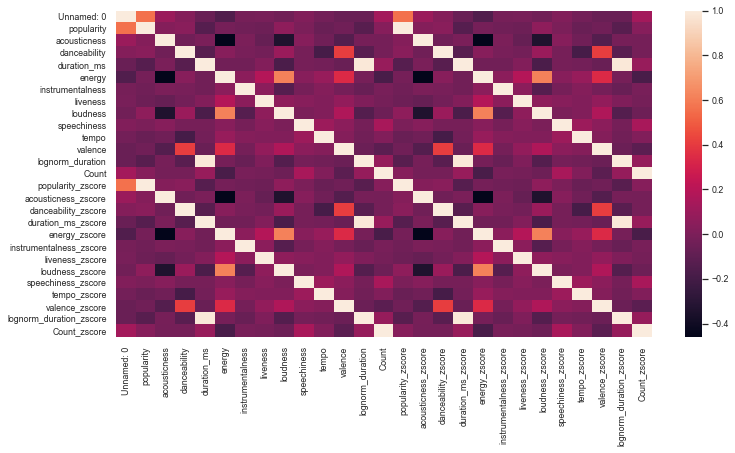

In [44]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Dance']
df = dfg[dfg['genre'] == 'Dance']

danpop = df[df.popular == 'popular']
nondanpop = df[df.popular == 'not-popular']

sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(danpop.corr())
c = danpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)



                         Popularity Correlation
Unnamed: 0                             0.223049
popularity                             1.000000
acousticness                           0.037873
danceability                           0.021170
duration_ms                            0.043486
energy                                 0.029796
instrumentalness                       0.062585
liveness                               0.045965
loudness                               0.030306
speechiness                            0.004298
tempo                                  0.009182
valence                                0.012037
lognorm_duration                       0.033737
Count                                  0.027684
popularity_zscore                      1.000000
acousticness_zscore                    0.037873
danceability_zscore                    0.021170
duration_ms_zscore                     0.043486
energy_zscore                          0.029796
instrumentalness_zscore                0

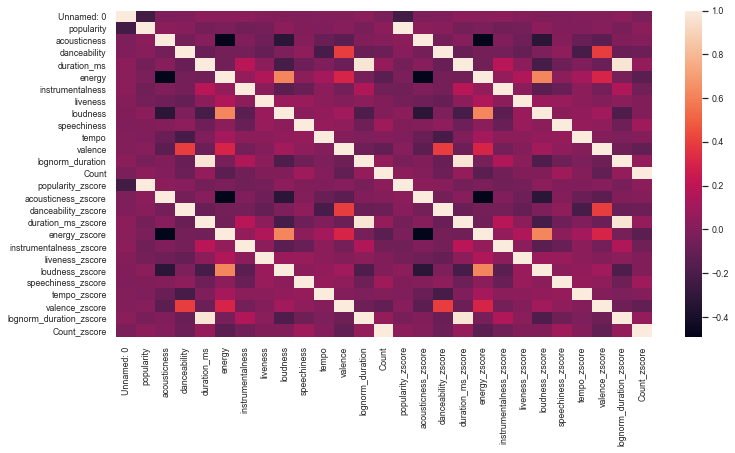

In [45]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nondanpop.corr())
c = nondanpop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)

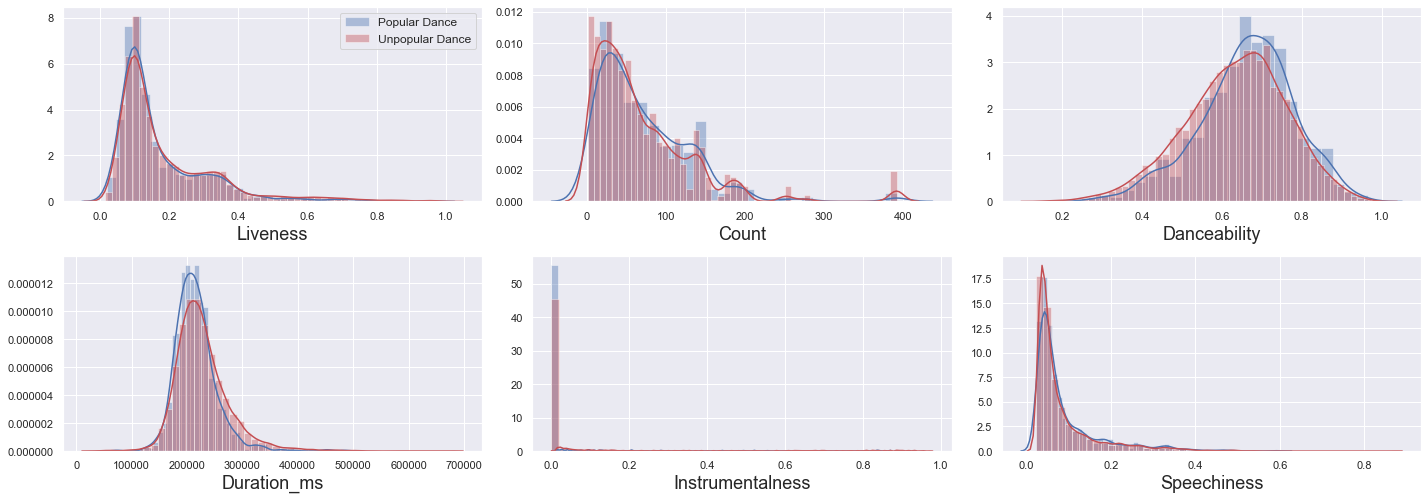

In [46]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(danpop.liveness, label='Popular Dance')
sns.distplot(nondanpop.liveness, color='r', label='Unpopular Dance')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(danpop.Count)
sns.distplot(nondanpop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(danpop.danceability)
sns.distplot(nondanpop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(danpop.duration_ms)
sns.distplot(nondanpop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(danpop.instrumentalness)
sns.distplot(nondanpop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(danpop.speechiness)
sns.distplot(nondanpop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


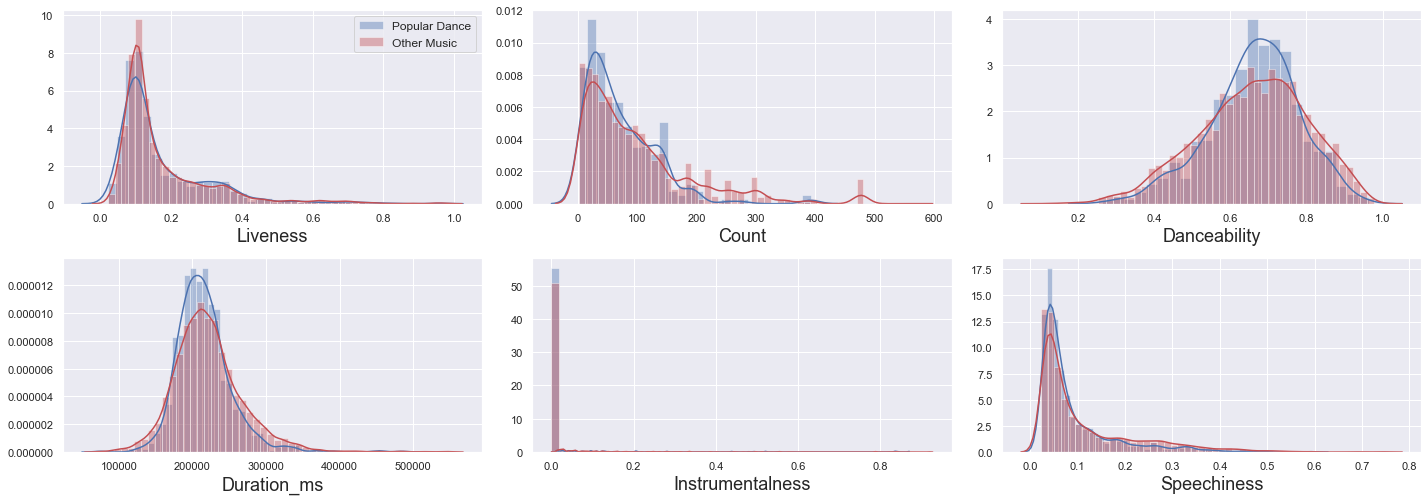

In [47]:
plt.figure(figsize=(20,10))
sns.set()

plt.subplot(331)
sns.distplot(danpop.liveness, label='Popular Dance')
sns.distplot(pop.liveness, color='r', label='Other Music')
plt.xlabel('Liveness', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(332)
sns.distplot(danpop.Count)
sns.distplot(pop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(333)
sns.distplot(danpop.danceability)
sns.distplot(pop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(334)
sns.distplot(danpop.duration_ms)
sns.distplot(pop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(335)
sns.distplot(danpop.instrumentalness)
sns.distplot(pop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.subplot(336)
sns.distplot(danpop.speechiness)
sns.distplot(pop.speechiness, color='r')
plt.xlabel('Speechiness', fontsize=18)

plt.tight_layout()
plt.show()


# BLUES

                         Popularity Correlation
Unnamed: 0                             0.209527
popularity                             1.000000
acousticness                           0.013696
danceability                           0.018215
duration_ms                            0.041429
energy                                 0.032572
instrumentalness                       0.086188
liveness                               0.041125
loudness                               0.092708
speechiness                            0.025798
tempo                                  0.032107
valence                                0.091151
lognorm_duration                       0.033415
Count                                  0.157484
popularity_zscore                      1.000000
acousticness_zscore                    0.013696
danceability_zscore                    0.018215
duration_ms_zscore                     0.041429
energy_zscore                          0.032572
instrumentalness_zscore                0

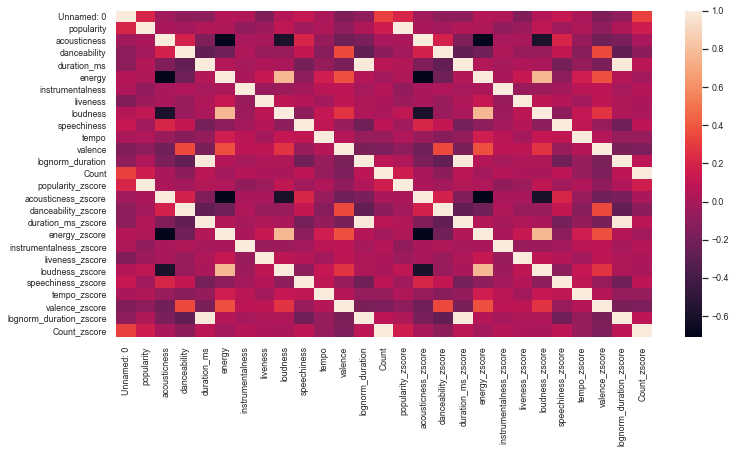

In [48]:
dfg = pd.read_csv('Data.csv')
dfe = dfg[dfg['genre'] != 'Blues']
df = dfg[dfg['genre'] == 'Blues']

blupop = df[df.popular == 'popular']
nonblupop = df[df.popular == 'not-popular']

sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(blupop.corr())
c = blupop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)



                         Popularity Correlation
Unnamed: 0                             0.283943
popularity                             1.000000
acousticness                           0.007831
danceability                           0.065565
duration_ms                            0.020139
energy                                 0.014335
instrumentalness                       0.030022
liveness                               0.026340
loudness                               0.016221
speechiness                            0.019036
tempo                                  0.039536
valence                                0.057191
lognorm_duration                       0.038499
Count                                  0.080252
popularity_zscore                      1.000000
acousticness_zscore                    0.007831
danceability_zscore                    0.065565
duration_ms_zscore                     0.020139
energy_zscore                          0.014335
instrumentalness_zscore                0

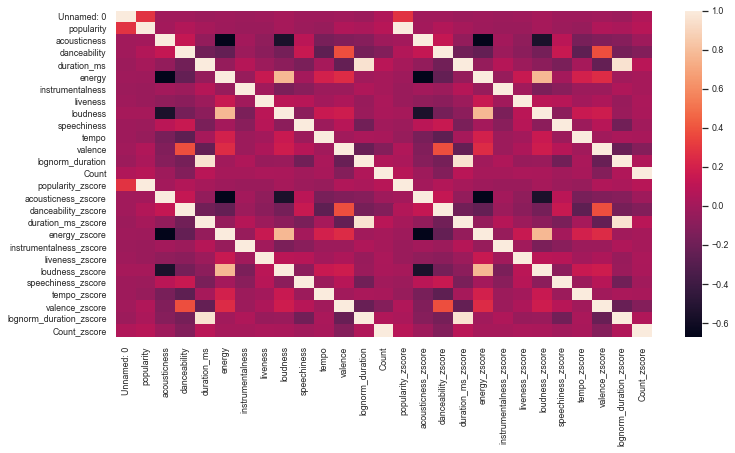

In [49]:
sns.set(font_scale=0.8)
plt.figure(figsize=(12, 6))
sns.heatmap(nonblupop.corr())
c = nonblupop.corr().abs()
s = c.unstack()
s = s.popularity
s = pd.DataFrame(s,columns=['Popularity Correlation'])
s.drop('Unnamed: 0')

print(s)



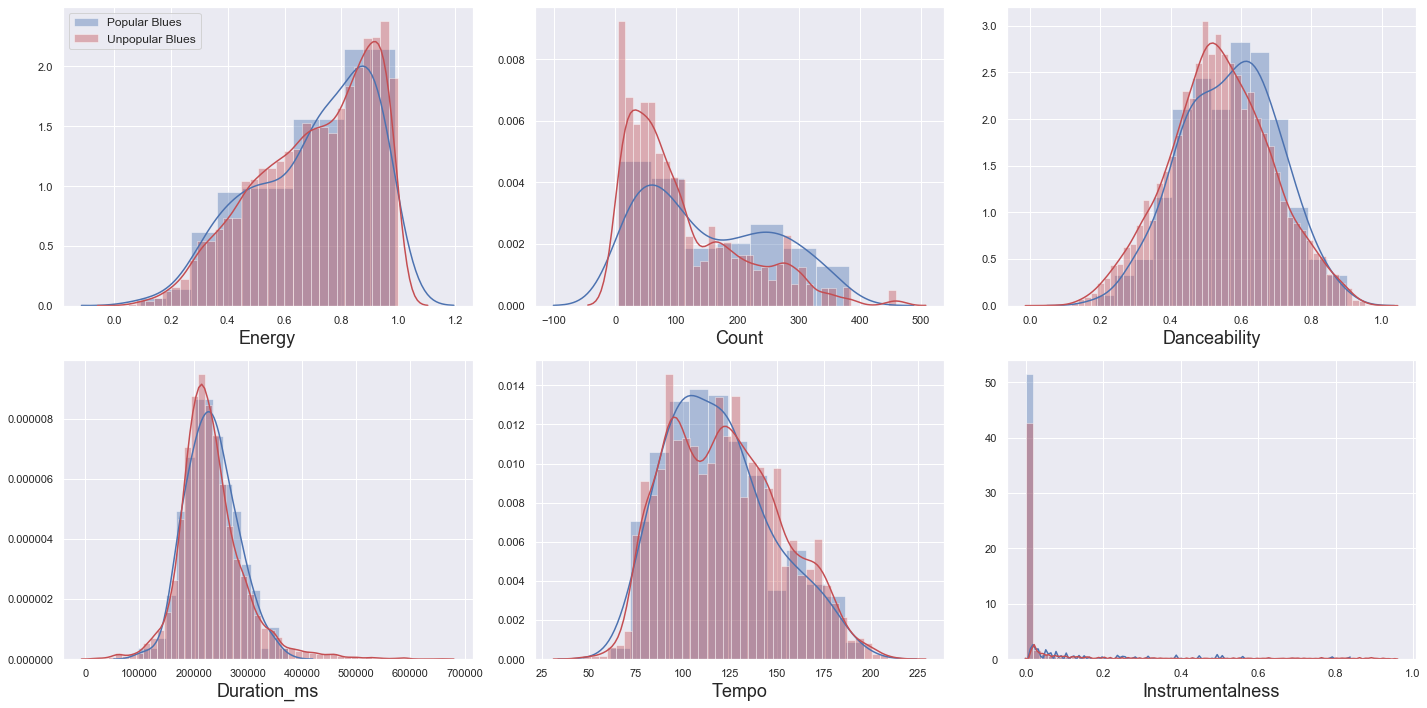

In [50]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(blupop.energy, label='Popular Blues')
sns.distplot(nonblupop.energy, color='r', label='Unpopular Blues')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(blupop.Count)
sns.distplot(nonblupop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(blupop.danceability)
sns.distplot(nonblupop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(blupop.duration_ms)
sns.distplot(nonblupop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(blupop.tempo)
sns.distplot(nonblupop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(blupop.instrumentalness)
sns.distplot(nonblupop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


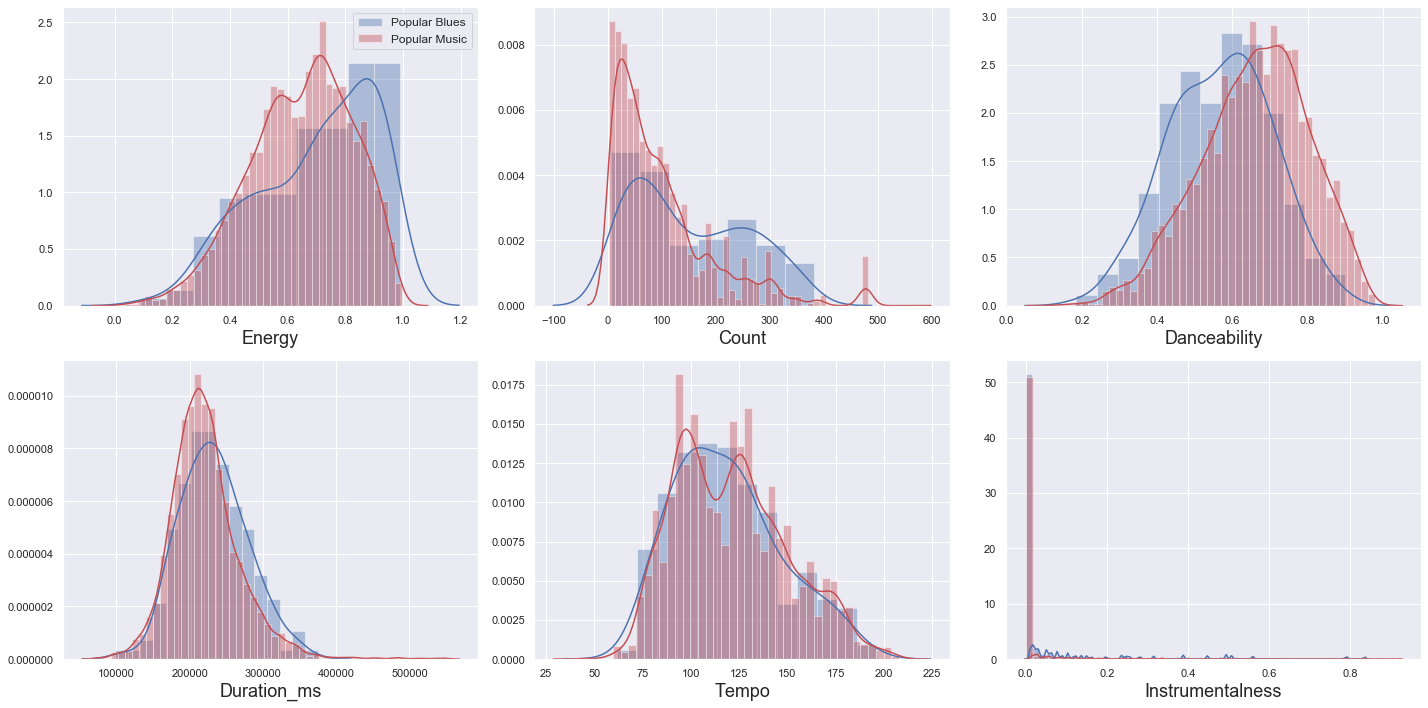

In [51]:
plt.figure(figsize=(20,10))
sns.set()
plt.subplot(231)
sns.distplot(blupop.energy, label='Popular Blues')
sns.distplot(pop.energy, color='r', label='Popular Music')
plt.xlabel('Energy', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(232)
sns.distplot(blupop.Count)
sns.distplot(pop.Count, color='r')
plt.xlabel('Count', fontsize=18)

plt.subplot(233)
sns.distplot(blupop.danceability)
sns.distplot(pop.danceability, color='r')
plt.xlabel('Danceability', fontsize=18)

plt.subplot(234)
sns.distplot(blupop.duration_ms)
sns.distplot(pop.duration_ms, color='r')
plt.xlabel('Duration_ms', fontsize=18)

plt.subplot(235)
sns.distplot(blupop.tempo)
sns.distplot(pop.tempo, color='r')
plt.xlabel('Tempo', fontsize=18)

plt.subplot(236)
sns.distplot(blupop.instrumentalness)
sns.distplot(pop.instrumentalness, color='r')
plt.xlabel('Instrumentalness', fontsize=18)

plt.tight_layout()
plt.show()


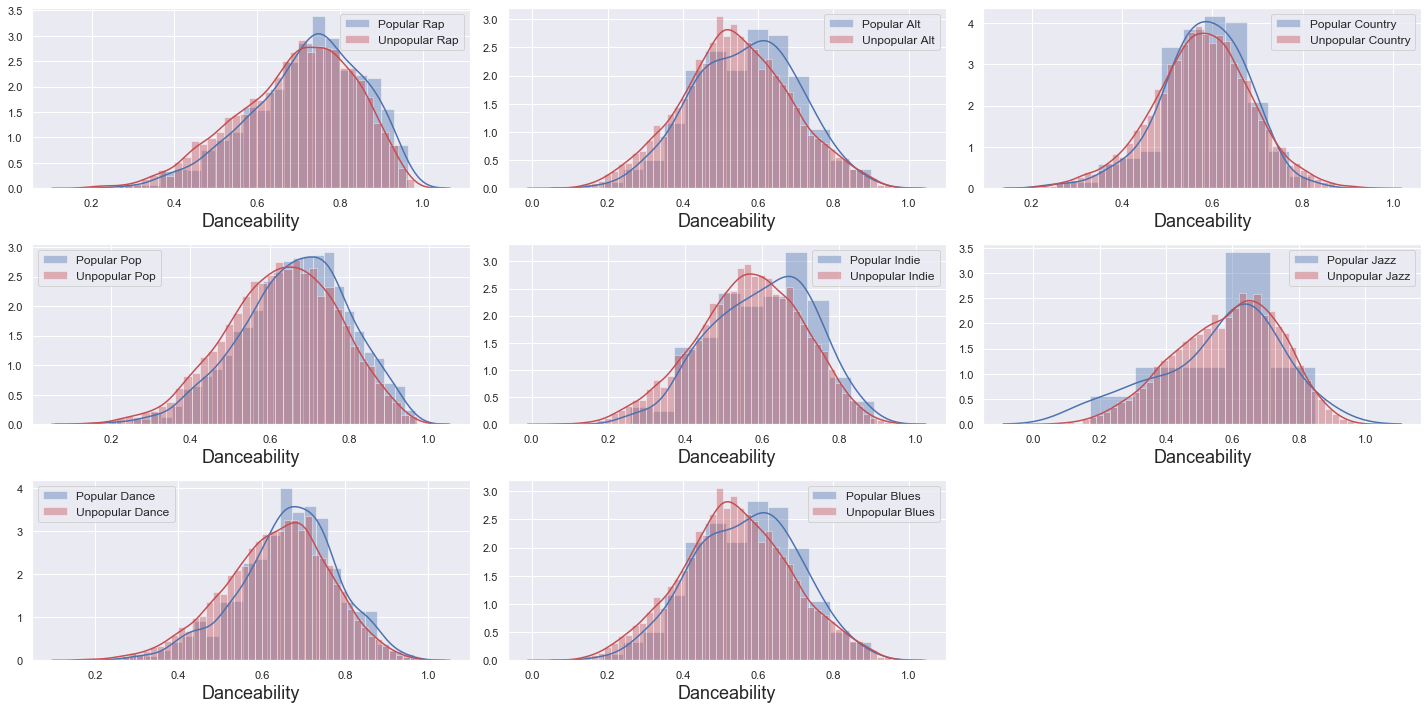

In [52]:
plt.figure(figsize=(20,10))

sns.set()

plt.subplot(331)
sns.distplot(rappop.danceability, label='Popular Rap')
sns.distplot(nonrappop.danceability, color='r', label='Unpopular Rap')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)
 
plt.subplot(332)
sns.distplot(altpop.danceability, label='Popular Alt')
sns.distplot(nonaltpop.danceability, color='r', label='Unpopular Alt')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(333)
sns.distplot(coupop.danceability, label='Popular Country')
sns.distplot(noncoupop.danceability, color='r', label='Unpopular Country')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(334)
sns.distplot(poppop.danceability, label='Popular Pop')
sns.distplot(nonpoppop.danceability, color='r', label='Unpopular Pop')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(335)
sns.distplot(indpop.danceability, label='Popular Indie')
sns.distplot(nonindpop.danceability, color='r', label='Unpopular Indie')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(336)
sns.distplot(jazpop.danceability, label='Popular Jazz')
sns.distplot(nonjazpop.danceability, color='r', label='Unpopular Jazz')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(337)
sns.distplot(danpop.danceability, label='Popular Dance')
sns.distplot(nondanpop.danceability, color='r', label='Unpopular Dance')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(338)
sns.distplot(blupop.danceability, label='Popular Blues')
sns.distplot(nonblupop.danceability, color='r', label='Unpopular Blues')
plt.xlabel('Danceability', fontsize=18)
plt.legend(fontsize=12)



plt.tight_layout()
plt.show()


In [53]:
from scipy import stats
rvs1 = nonrappop.popularity
rvs2 = rappop.popularity
print ('Rap: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonaltpop.popularity
rvs2 = altpop.popularity
print ('Alternative: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = noncoupop.popularity
rvs2 = coupop.popularity
print ('Country: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonpoppop.popularity
rvs2 = poppop.popularity
print ('Pop: "+ '+str(stats.ttest_ind(rvs1,rvs2)))


rvs1 = nonindpop.popularity
rvs2 = indpop.popularity
print ('Ind: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonjazpop.popularity
rvs2 = jazpop.popularity
print ('Jazz: "+ '+str(stats.ttest_ind(rvs1,rvs2)))


rvs1 = nondanpop.popularity
rvs2 = danpop.popularity
print ('Dance: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonblupop.popularity
rvs2 = blupop.popularity
print ('Blues: "+ '+str(stats.ttest_ind(rvs1,rvs2)))


Rap: "+ Ttest_indResult(statistic=-101.5051080858575, pvalue=0.0)
Alternative: "+ Ttest_indResult(statistic=-49.880861177492214, pvalue=0.0)
Country: "+ Ttest_indResult(statistic=-35.922853347663526, pvalue=1.464196839948724e-263)
Pop: "+ Ttest_indResult(statistic=-117.02476409834857, pvalue=0.0)
Ind: "+ Ttest_indResult(statistic=-49.05757839168414, pvalue=0.0)
Jazz: "+ Ttest_indResult(statistic=-12.260587128523978, pvalue=2.6865478602725893e-34)
Dance: "+ Ttest_indResult(statistic=-65.25145532133884, pvalue=0.0)
Blues: "+ Ttest_indResult(statistic=-49.880861177492214, pvalue=0.0)


In [54]:
plt.figure(figsize=(20,10))

sns.set()

plt.subplot(331)
sns.distplot(rappop.Count, label='Popular Rap')
sns.distplot(nonrappop.Count, color='r', label='Unpopular Rap')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)
 
plt.subplot(332)
sns.distplot(altpop.Count, label='Popular Alt')
sns.distplot(nonaltpop.Count, color='r', label='Unpopular Alt')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(333)
sns.distplot(coupop.Count, label='Popular Country')
sns.distplot(noncoupop.Count, color='r', label='Unpopular Country')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(334)
sns.distplot(poppop.Count, label='Popular Pop')
sns.distplot(nonpoppop.Count, color='r', label='Unpopular Pop')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(335)
sns.distplot(indpop.Count, label='Popular Indie')
sns.distplot(nonindpop.Count, color='r', label='Unpopular Indie')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(336)
sns.distplot(jazpop.Count, label='Popular Jazz')
sns.distplot(nonjazpop.Count, color='r', label='Unpopular Jazz')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(337)
sns.distplot(danpop.Count, label='Popular Dance')
sns.distplot(nondanpop.Count, color='r', label='Unpopular Dance')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)

plt.subplot(338)
sns.distplot(blupop.Count, label='Popular Blues')
sns.distplot(nonblupop.Count, color='r', label='Unpopular Blues')
plt.xlabel('Count', fontsize=18)
plt.legend(fontsize=12)





plt.tight_layout()
plt.show()


In [55]:
from scipy import stats
rvs1 = nonrappop.Count
rvs2 = rappop.Count
print ('Rap: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonaltpop.Count
rvs2 = altpop.Count
print ('Alternative: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = noncoupop.Count
rvs2 = coupop.Count
print ('Country: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonpoppop.Count
rvs2 = poppop.Count
print ('Pop: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonindpop.Count
rvs2 = indpop.Count
print ('Ind: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonjazpop.Count
rvs2 = jazpop.Count
print ('Jazz: "+ '+str(stats.ttest_ind(rvs1,rvs2)))


rvs1 = nondanpop.Count
rvs2 = danpop.Count
print ('Dance: "+ '+str(stats.ttest_ind(rvs1,rvs2)))

rvs1 = nonblupop.Count
rvs2 = blupop.Count
print ('Blues: "+ '+str(stats.ttest_ind(rvs1,rvs2)))



Rap: "+ Ttest_indResult(statistic=-7.385329344490001, pvalue=1.6526795090006723e-13)
Alternative: "+ Ttest_indResult(statistic=-7.717842141530163, pvalue=1.3044637353516236e-14)
Country: "+ Ttest_indResult(statistic=-2.3884446578287393, pvalue=0.01694114242087883)
Pop: "+ Ttest_indResult(statistic=0.26697198518298576, pvalue=0.7894965974953911)
Ind: "+ Ttest_indResult(statistic=-4.883642303618579, pvalue=1.0583512657654159e-06)
Jazz: "+ Ttest_indResult(statistic=-5.910538621057678, pvalue=3.528085721707985e-09)
Dance: "+ Ttest_indResult(statistic=-1.1193343746995883, pvalue=0.2630284217120371)
Blues: "+ Ttest_indResult(statistic=-7.717842141530163, pvalue=1.3044637353516236e-14)
